In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('/content/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df.duplicated().sum()

0

In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [73]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [75]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [76]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [77]:
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [79]:
#Assigning numeric values for preprocessing data

df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1,'Q':2})

In [80]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


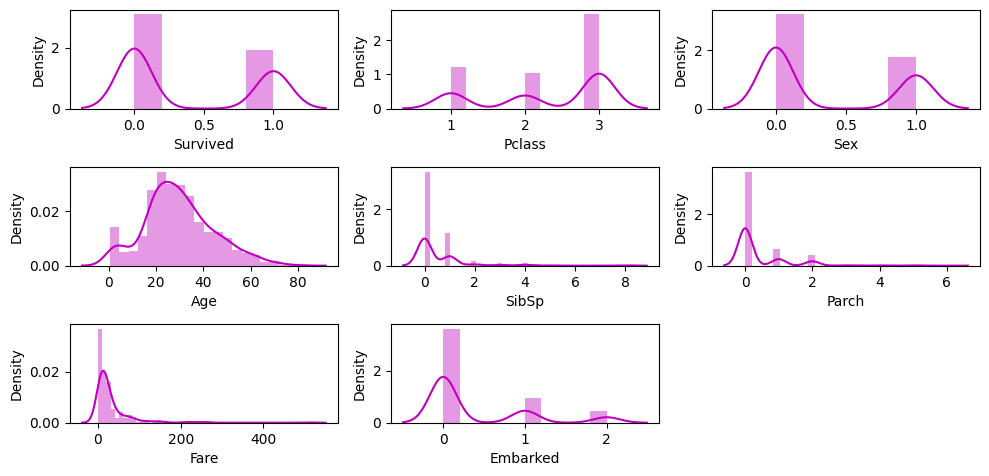

In [81]:
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[i], color='m')  # Use histplot instead of displot for individual axes
        plt.xlabel(i)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

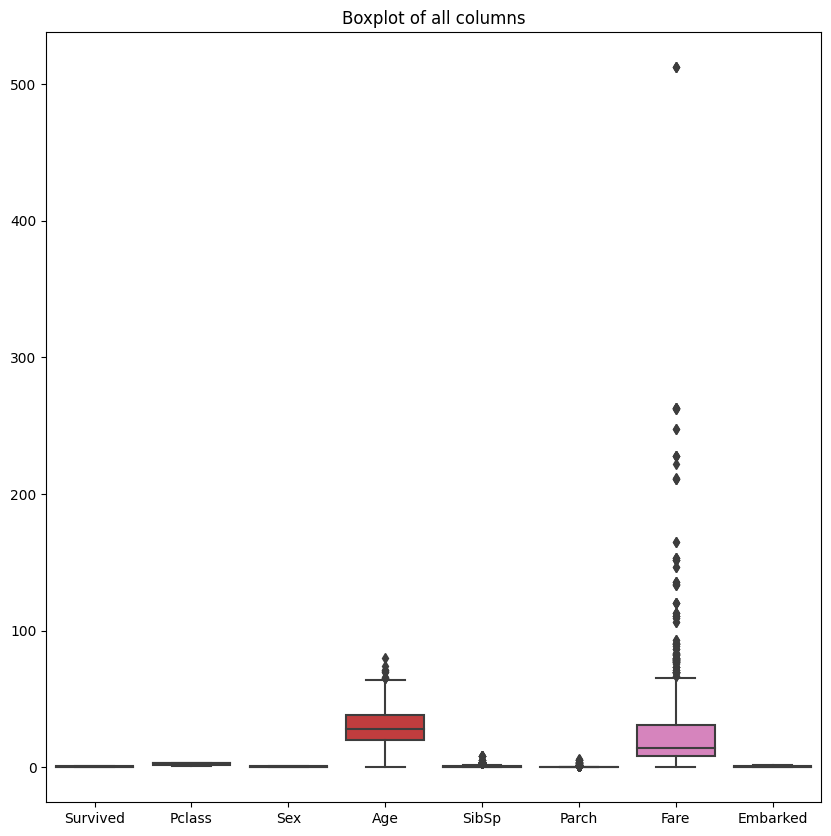

In [82]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.title('Boxplot of all columns')
plt.show()

In [83]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [84]:
df.shape

(891, 8)

In [85]:
df.dropna(inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,0.362205
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<Axes: >

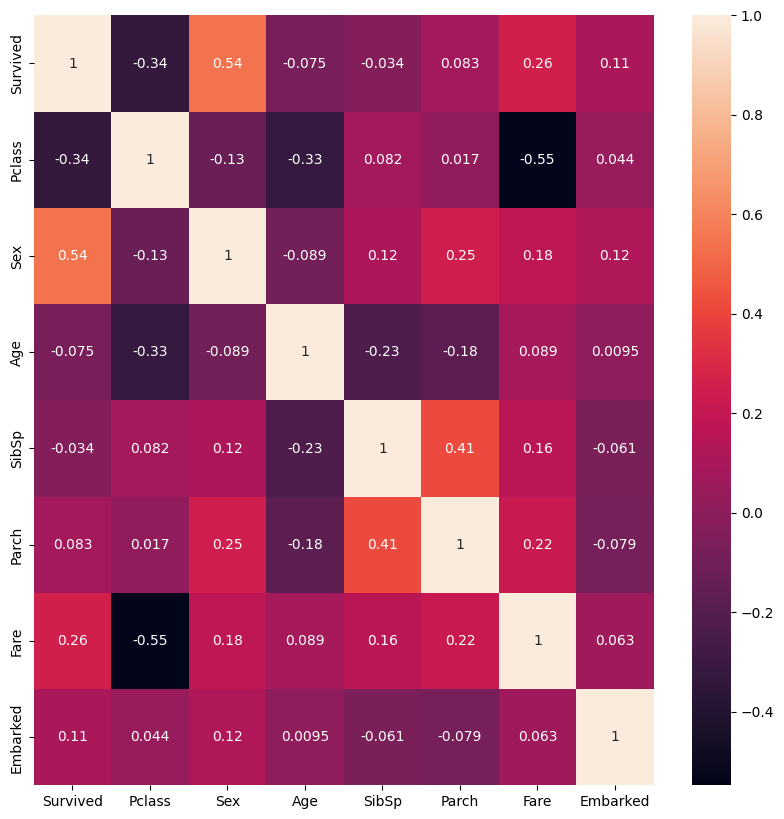

In [87]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

In [88]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex         0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked    1.539926
dtype: float64

In [89]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [90]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [92]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-2.437745e-16,-4.395934e-17,3.316932e-16,-3.197043e-17,-4.795564e-17,1.398706e-16,-1.138946e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-1.572211e+00,-7.353420e-01,-2.255481e+00,-4.751991e-01,-4.743259e-01,-6.462044e-01,-5.696840e-01
25%,-3.735013e-01,-7.353420e-01,-5.904949e-01,-4.751991e-01,-4.743259e-01,-4.872378e-01,-5.696840e-01
50%,8.252086e-01,-7.353420e-01,3.523727e-03,-4.751991e-01,-4.743259e-01,-3.551972e-01,-5.696840e-01
75%,8.252086e-01,1.359911e+00,4.125086e-01,4.313502e-01,-4.743259e-01,-2.207954e-02,1.003139e+00
max,8.252086e-01,1.359911e+00,3.884444e+00,6.777195e+00,6.967010e+00,9.668551e+00,2.575963e+00


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.693214,Pclass
1,1.124487,Sex
2,1.203037,Age
3,1.277471,SibSp
4,1.332385,Parch
5,1.617653,Fare
6,1.052094,Embarked


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.8689138576779026 random_state is 168


#Create Train Test Split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

#Classification Algorithms

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Logistic Regression

In [97]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.8352059925093633
[[143  24]
 [ 20  80]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.77      0.80      0.78       100

    accuracy                           0.84       267
   macro avg       0.82      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



#RandomForest

In [98]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.8689138576779026
[[149  18]
 [ 17  83]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       167
           1       0.82      0.83      0.83       100

    accuracy                           0.87       267
   macro avg       0.86      0.86      0.86       267
weighted avg       0.87      0.87      0.87       267



#Support Vector Machine Classifier

In [99]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8651685393258427
[[157  10]
 [ 26  74]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       167
           1       0.88      0.74      0.80       100

    accuracy                           0.87       267
   macro avg       0.87      0.84      0.85       267
weighted avg       0.87      0.87      0.86       267



#Gradient Boosting Classifier

In [100]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8426966292134831
[[150  17]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       167
           1       0.82      0.75      0.78       100

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



#AdaBoost

In [101]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.8389513108614233
[[142  25]
 [ 18  82]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       167
           1       0.77      0.82      0.79       100

    accuracy                           0.84       267
   macro avg       0.83      0.84      0.83       267
weighted avg       0.84      0.84      0.84       267



#Bagging Classifier

In [102]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8277153558052435
[[142  25]
 [ 21  79]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       167
           1       0.76      0.79      0.77       100

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



#Extra Tree Classifier

In [103]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.8239700374531835
[[143  24]
 [ 23  77]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       167
           1       0.76      0.77      0.77       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



#Cross Validation

In [104]:
#check cv score for logistic regression

score=cross_val_score(lg,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_lg) - score.mean())

[0.79213483 0.79213483 0.78651685 0.76966292 0.81920904]
0.7919316955500539
Difference between accuracy score and cross valication score is 0.0432742969593094


In [105]:
#check cv score for randomforest

score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())


[0.80337079 0.80337079 0.85393258 0.75842697 0.81920904]
0.8076620326287056
Difference between accuracy score and cross valication score is 0.06125182504919702


In [106]:
#check cv score for svc

score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.83146067 0.83146067 0.81460674 0.80337079 0.87570621]
0.831321018218752
Difference between accuracy score and cross valication score is 0.03384752110709066


In [107]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.80898876 0.80898876 0.84269663 0.80337079 0.85310734]
0.8234304576905986
Difference between accuracy score and cross valication score is 0.019266171522884457


In [108]:
#check cv score for Adaboost

score=cross_val_score(Ada,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.74157303 0.81460674 0.80898876 0.78651685 0.82485876]
0.7953088300641147
Difference between accuracy score and cross valication score is 0.04364248079730859


In [109]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.78651685 0.82022472 0.85955056 0.79775281 0.81355932]
0.8155208531708247
Difference between accuracy score and cross valication score is 0.012194502634418791


In [110]:
#check cv score for Bagging Classifier

score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.7247191  0.74719101 0.78089888 0.78089888 0.77966102]
0.7626737764235384
Difference between accuracy score and cross valication score is 0.06129626102964514


#Performing OverSampling and running the model

In [47]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [48]:
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.8666666666666667 random_state is 114


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=maxRs)

#Logistic Regression

In [51]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.8545454545454545
[[134  27]
 [ 21 148]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       161
           1       0.85      0.88      0.86       169

    accuracy                           0.85       330
   macro avg       0.86      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



#RandomForest

In [52]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.8545454545454545
[[135  26]
 [ 22 147]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.85      0.87      0.86       169

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



#Support Vector Machine Classifier

In [53]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8424242424242424
[[145  16]
 [ 36 133]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       161
           1       0.89      0.79      0.84       169

    accuracy                           0.84       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.84      0.84       330



#Gradient Boosting Classifier

In [54]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8666666666666667
[[143  18]
 [ 26 143]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       161
           1       0.89      0.85      0.87       169

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



#AdaBoost

In [55]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.8484848484848485
[[135  26]
 [ 24 145]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       161
           1       0.85      0.86      0.85       169

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



#Bagging Classifier

In [56]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8545454545454545
[[135  26]
 [ 22 147]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.85      0.87      0.86       169

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



#Extra Tree Classifier

In [57]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.8151515151515152
[[130  31]
 [ 30 139]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       161
           1       0.82      0.82      0.82       169

    accuracy                           0.82       330
   macro avg       0.82      0.81      0.82       330
weighted avg       0.82      0.82      0.82       330



#Cross Validation

In [58]:
#check cv score for logistic regression

score=cross_val_score(lg,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_lg) - score.mean())

[0.76818182 0.8        0.75       0.81278539 0.8173516 ]
0.7896637608966376
Difference between accuracy score and cross valication score is 0.06488169364881691


In [59]:
#check cv score for randomforest

score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.76363636 0.80454545 0.83181818 0.87671233 0.87671233]
0.8306849315068494
Difference between accuracy score and cross valication score is 0.023860523038605086


In [60]:
#check cv score for svc

score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.77727273 0.82272727 0.76818182 0.84018265 0.87214612]
0.8161021170610212
Difference between accuracy score and cross valication score is 0.026322125363221205


In [61]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.78636364 0.82727273 0.8        0.86757991 0.85844749]
0.8279327521793276
Difference between accuracy score and cross valication score is 0.038733914487339094


In [62]:
#check cv score for Adaboost

score=cross_val_score(Ada,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.73636364 0.80909091 0.78181818 0.86757991 0.85388128]
0.8097467828974679
Difference between accuracy score and cross valication score is 0.03873806558738058


In [63]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.77727273 0.8        0.81818182 0.89497717 0.87214612]
0.8325155666251556
Difference between accuracy score and cross valication score is 0.02202988792029892


In [64]:
#check cv score for ExtraTree Classifier

score=cross_val_score(et,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.73181818 0.77727273 0.76363636 0.84474886 0.81278539]
0.7860523038605229
Difference between accuracy score and cross valication score is 0.029099211290992244


Conclusion: GradientBoosting without oversampling permorms well

#Hyper Parameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

In [115]:
GVC=GridSearchCV(bc,hyperparameters,cv=5,scoring='accuracy',verbose=2)

In [116]:
GVC.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_features=0.5, max_samples=0.5, n_e

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

In [117]:
GVC.best_params_

{'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 50}

In [118]:
final_model=BaggingClassifier(max_features= 1.0, max_samples= 0.7, n_estimators=50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.89138576779027


#Save the Model

In [119]:
import joblib
joblib.dump(final_model,'titanic_prediction.pkl')

['titanic_prediction.pkl']

In [121]:
model=joblib.load('titanic_prediction.pkl')

In [122]:
predictions = model.predict(x_test)

In [123]:
print("Predictions:", predictions)

Predictions: [0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 0]
